In [1]:
import os
import glob
from collections import defaultdict

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

%matplotlib inline

In [4]:
image_list = glob.glob('./inputs/labelme/*.jpg')
print(len(image_list))

60


In [5]:
def is_four_by_three(w,h):
    if w/h == 3/4:
        return True
    else: 
        return False

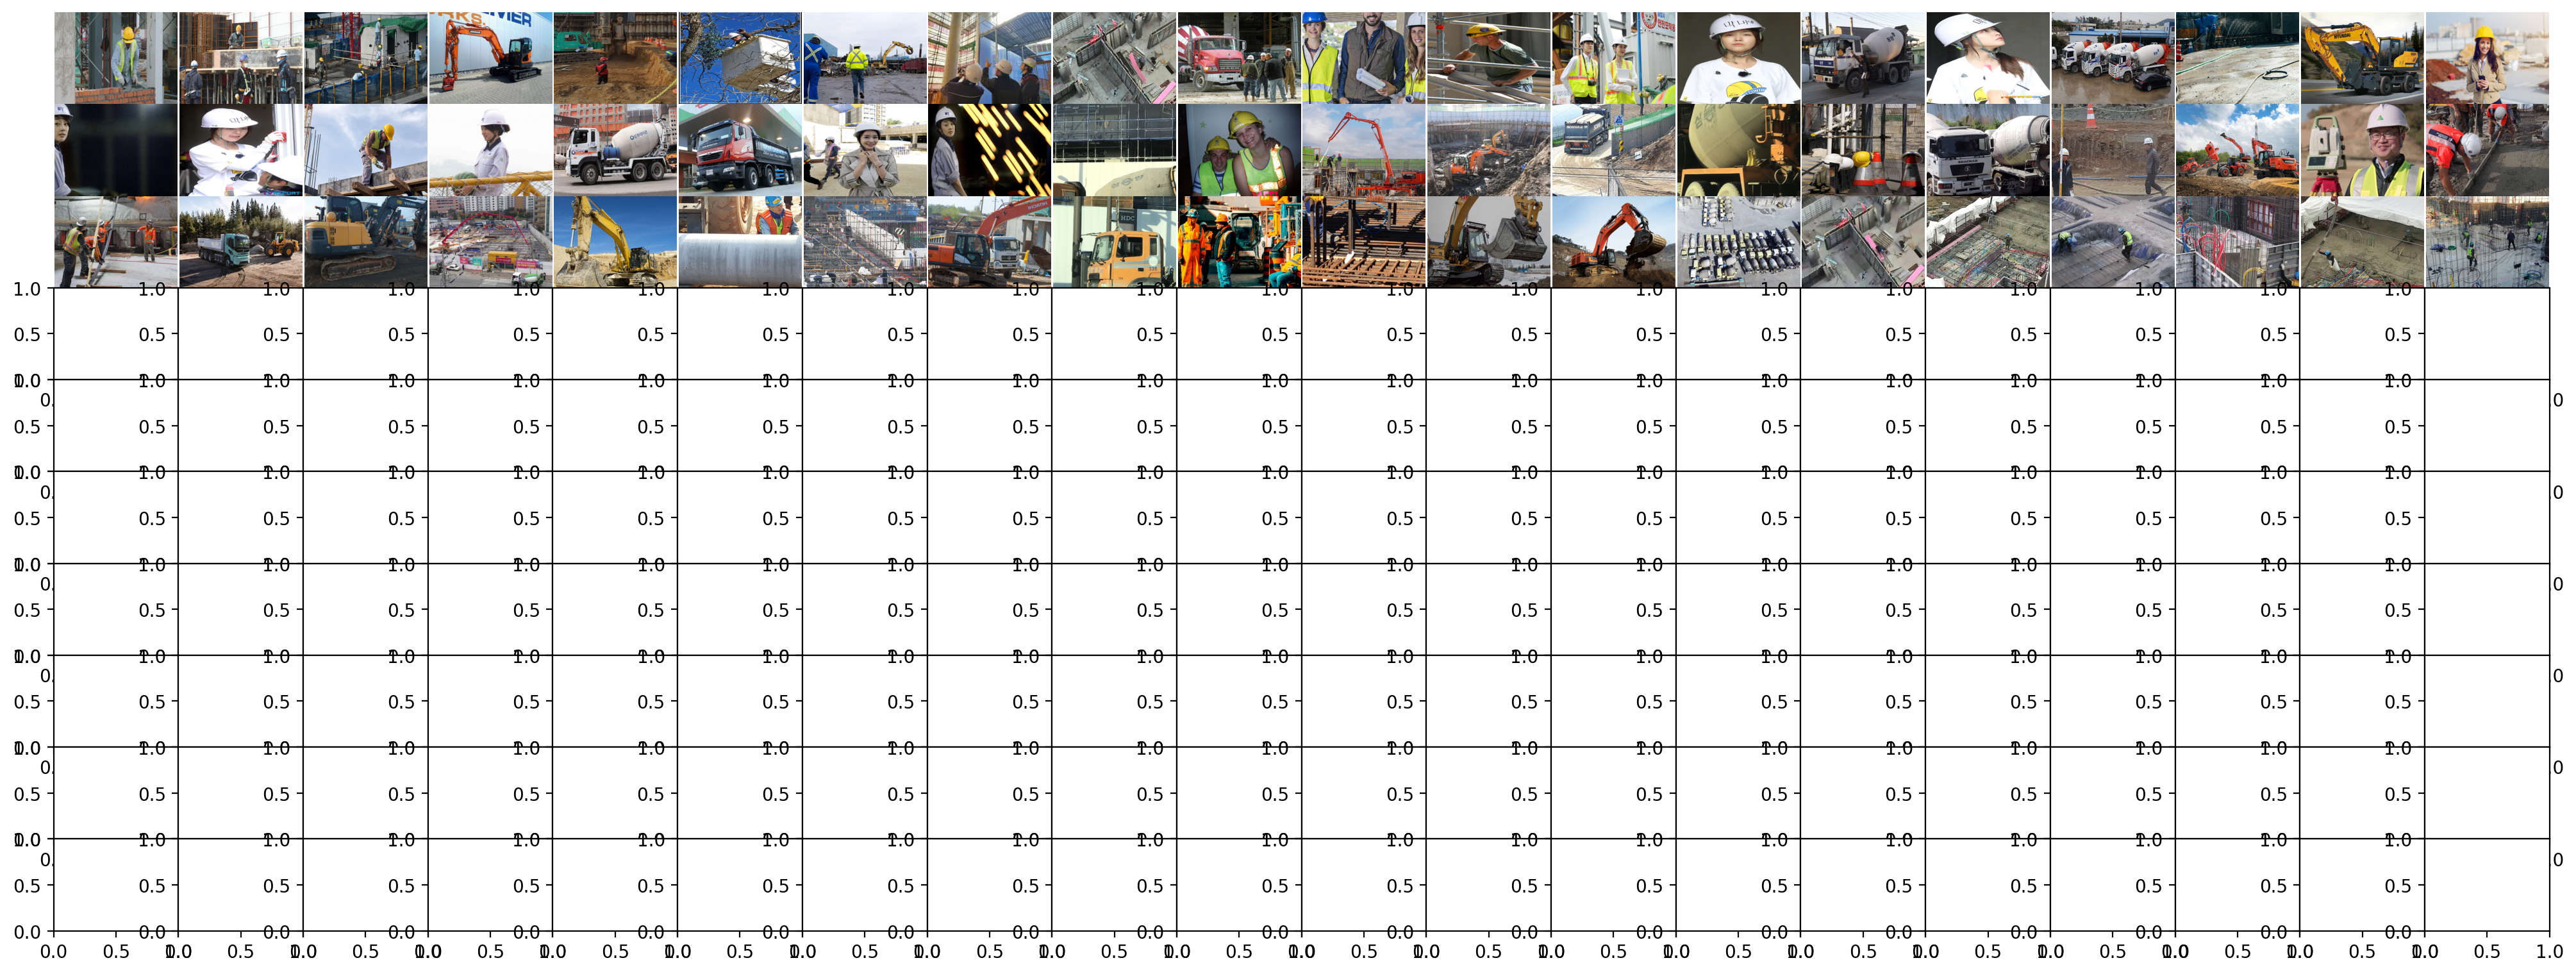

In [6]:
fig, axes = plt.subplots(10, 20, figsize=(20,7.7), dpi=200) # 20 10 20, 7.5

for i, image in enumerate(image_list[:200]):
    img = Image.open(image)
    w, h = img.size
    
    if w >= 800 and h >= 600:
        if is_four_by_three(w, h):
            cropped_img = img.resize((400, 300))
        else:
            # Resize image if size is too large
            rw, rh = int(w*0.5), int(h*0.5)

            # Get center coordinate
            crw, crh = int(rw*0.5), int(rh*0.5)

            rw_left = crw - 200
            rw_right = crw + 200
            rh_top = crh - 150
            rh_bottom = crh + 150

            img = img.resize((rw, rh))
            cropped_img = img.crop((rw_left, rh_top, rw_right, rh_bottom)) #left, upper, right, lower
    else:
        w, h = img.size
        cropped_img = img.resize((400, 300))
        
    axes.flat[i].imshow(cropped_img)
    axes.flat[i].axis('off')
    
fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()
# fig.savefig('many_img.png', bbox_inches='tight')